Name - **D.M.S.S.Dissanayake**  Index No - **190155L**

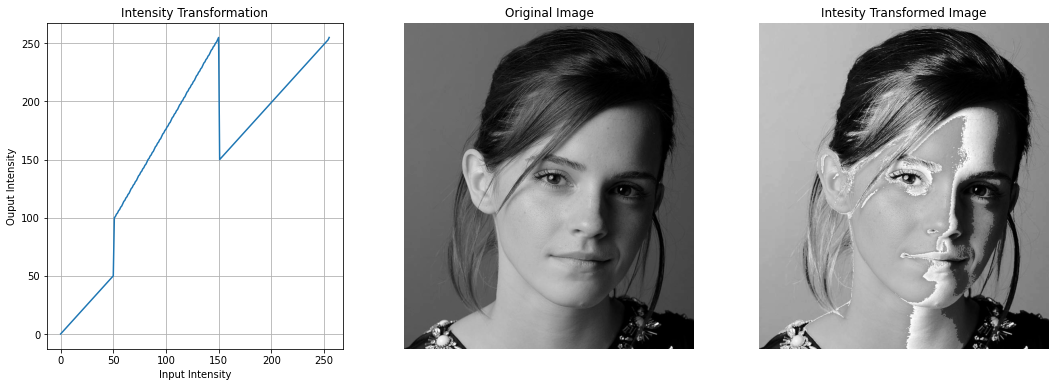

In [2]:
# Question 1
import matplotlib.pyplot as plt
import cv2 as  cv
import numpy as np


img = cv.imread("emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150,255,105)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

assert len(t) == 256
g = cv.LUT(img, t)

fig, ax = plt.subplots(1,3, figsize = (18,6))
ax[0].plot(t)
ax[0].grid()
ax[0].set_title('Intensity Transformation')
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Ouput Intensity')

ax[1].imshow(img, cmap= 'gray', vmin=0, vmax=255)
ax[1].set_title('Original Image')
ax[1].axis('off')

ax[2].imshow(g, cmap= 'gray', vmin=0, vmax=255)
ax[2].set_title('Intesity Transformed Image')
ax[2].axis('off')    

#for i in range(3):
#        ax[i].axis('off')
plt.show()

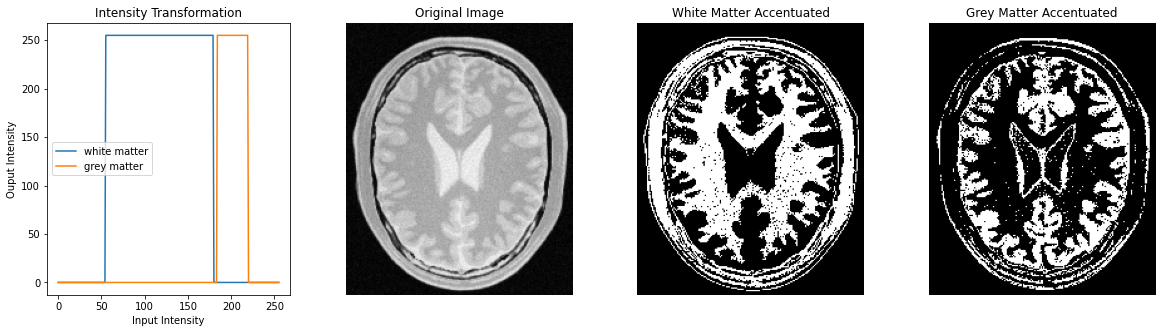

In [36]:
#Question 2
import matplotlib.pyplot as plt
import cv2 as  cv
import numpy as np


img = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,0,55)
t2 = np.linspace(255, 255, 125)
t3 = np.linspace(0,0,76)

t4 = np.linspace(0,0,184)
t5 = np.linspace(255, 255, 36)
t6 = np.linspace(0,0,36)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
t_ = np.concatenate((t4, t5, t6), axis=0).astype(np.uint8)

assert len(t) == 256
g = cv.LUT(img, t)
g_ = cv.LUT(img, t_)

fig, ax = plt.subplots(1,4, figsize = (20,5))
ax[0].plot(t, label = 'white matter')
ax[0].plot(t_, label = 'grey matter')
#ax[0].grid()
ax[0].set_title('Intensity Transformation')
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Ouput Intensity')
ax[1].imshow(img, cmap= 'gray', vmin=0, vmax=255)
ax[1].set_title('Original Image')
ax[0].legend()
ax[1].axis('off')

ax[2].imshow(g, cmap= 'gray', vmin=0, vmax=255)
ax[2].set_title('White Matter Accentuated')
ax[2].axis('off')    


ax[3].imshow(g_, cmap= 'gray', vmin=0, vmax=255)
ax[3].set_title('Grey Matter Accentuated')
ax[3].axis('off')    

#for i in range(3):
#        ax[i].axis('off')
plt.show()

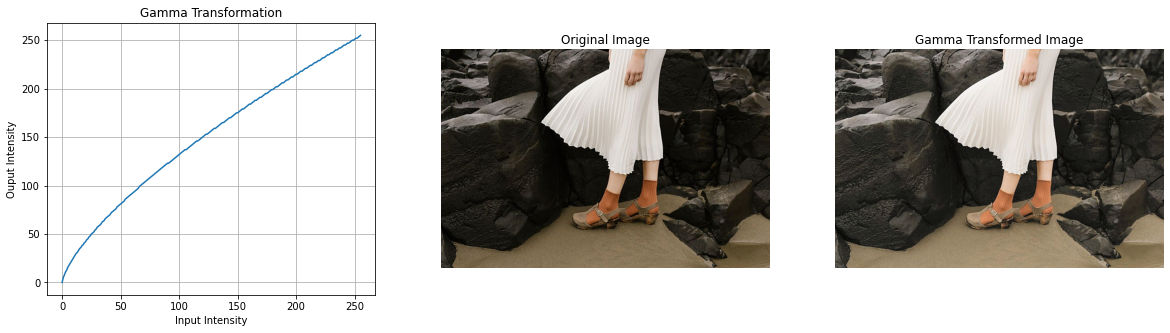

In [90]:
# Question 3
import matplotlib.pyplot as plt
import cv2 as  cv
import numpy as np


img = cv.imread("highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert img is not None

Lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
L,a,b = cv.split(Lab)

gamma = 0.7
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
assert len(t) == 256

L_ = cv.LUT(L, t)

final_Lab = cv.merge((L_, a, b))
corrected_img = cv.cvtColor(final_Lab, cv.COLOR_Lab2BGR)

fig, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].plot(t)
ax[0].grid()
ax[0].set_title('Gamma Transformation')
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Ouput Intensity')

ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title('Original Image')
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(corrected_img, cv.COLOR_BGR2RGB))
ax[2].set_title('Gamma Transformed Image')
ax[2].axis('off')    

#for i in range(3):
#        ax[i].axis('off')
plt.show()



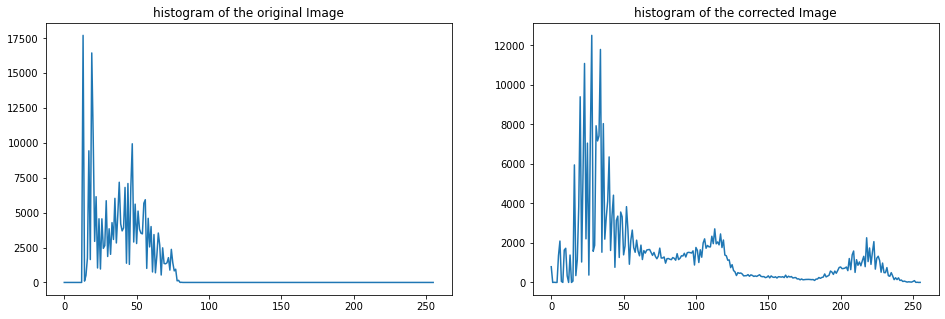

In [185]:
hist_img = cv.calcHist([img], [0], None, [256], [0,256])
hist_corrected_img = cv.calcHist([corrected_img], [0], None, [256], [0,256])

fig, ax = plt.subplots(1,2, figsize = (16,5))
ax[0].plot(hist_img)
ax[0].set_title('histogram of the original Image')
ax[1].plot(hist_corrected_img)
ax[1].set_title('histogram of the corrected Image')
plt.show()

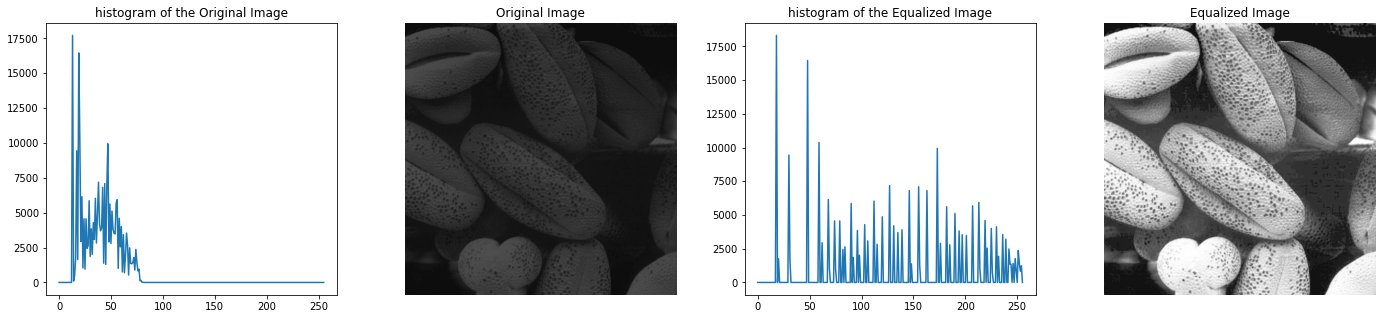

In [186]:
# Question 4
img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None

s = np.zeros((256,), dtype=np.uint8)
sum = 0
for r in range(0,256):
    sum += np.count_nonzero(img == r)
    s[r] = np.uint8(sum*(255/img.size))

equalized_img = cv.LUT(img, s)
hist_img = cv.calcHist([img], [0], None, [256], [0,256])
hist_equalized_img = cv.calcHist([equalized_img], [0], None, [256], [0,256])
fig, ax = plt.subplots(1,4, figsize = (24,5))
ax[0].plot(hist_img)
ax[0].set_title('histogram of the Original Image')
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title('Original Image')
ax[1].axis('off')
ax[2].plot(hist_equalized_img)
ax[2].set_title('histogram of the Equalized Image')
ax[3].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
ax[3].set_title('Equalized Image')
ax[3].axis('off')
plt.show()

In [15]:
# Question 5

img = cv.imread('im01small.png', cv.IMREAD_GRAYSCALE)
scale = 2
rows = int(scale*img.shape[0])
columns = int(scale*img.shape[1])

zoomed = np.zeros((rows,columns),dtype=img.dtype)
for i in range(0,rows):
    for j in range(0,columns):
       zoomed[i,j] = img[int(i/scale),int(j/scale)]

print(img.shape)
#print(zoomed)

#cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', img)
cv.waitKey(0)
cv.imshow('Zoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()



(270, 480)


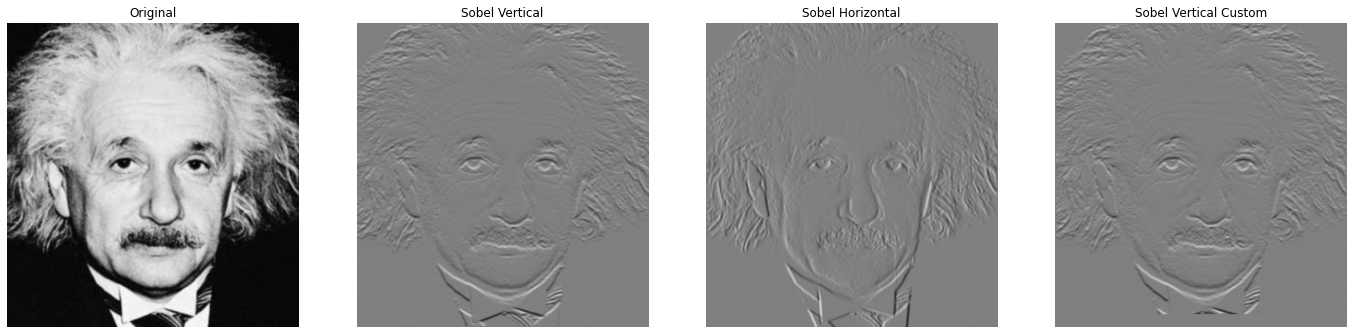

In [69]:
# Question 6

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None


sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype = np.float32)
img_x = cv.filter2D(img, -1, sobel_v)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = np.float32)
img_y = cv.filter2D(img, -1, sobel_h)

#img_grad = np.sqrt(img_x**2+img_y**2)

sobel_filtered_img = np.zeros((img.shape[0],img.shape[1]), dtype=np.int16)
for i in range(1,img.shape[0-1]):
    for j in range(1,img.shape[1]-1):
        mat = img[i-1,j-1:j+2],img[i,j-1:j+2],img[i+1,j-1:j+2]
        sobel_filtered_img[i,j] = np.multiply(mat,sobel_v).sum()

fig, ax = plt.subplots(1,4 , sharex = 'all' , sharey = 'all', figsize=(24,6))
ax[0].imshow(img,cmap= 'gray',vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_x,cmap= 'gray',vmin=-1020, vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(img_y,cmap= 'gray',vmin=-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(sobel_filtered_img,cmap= 'gray',vmin=-1020, vmax=1020)
ax[3].set_title('Sobel Vertical Custom')

for i in range(4):
        ax[i].axis('off')

plt.show()
